### CE007 : Lab 4 - Task 1: Try the algo on Dataset1 - OneHotEncoding of features: and Train test Division 70%-30%

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from subprocess import call

In [90]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
ds1 = pd.read_csv(r"./Dataset1.csv")
print("No. of examples and features in the dataset are:", ds1.shape)
ds1.head()

No. of examples and features in the dataset are: (14, 5)


,Outlook,Temp,Humidity,Wind,Play
0,R,H,Normal,F,N
1,R,H,High,T,N
2,O,H,Normal,F,Y
3,S,M,Normal,F,Y
4,S,C,Normal,F,Y


In [92]:
ds1.info()
ds1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Wind      14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


,Outlook,Temp,Humidity,Wind,Play
count,14,14,14,14,14
unique,3,3,3,2,2
top,S,M,Normal,F,Y
freq,5,6,8,8,9


In [93]:
print("Unique Outlook values: ", ds1['Outlook'].unique())
print("Unique Temperature values: ", ds1['Temp'].unique())
print("Unique Humidity values: ", ds1['Humidity'].unique())
print("Unique Wind values: ", ds1['Wind'].unique())
print("'Play' Class Labels values: ", ds1['Play'].unique())

Unique Outlook values:  ['R' 'O' 'S']
Unique Temperature values:  ['H' 'M' 'C']
Unique Humidity values:  ['Normal' 'High' 'Low']
Unique Wind values:  ['F' 'T']
'Play' Class Labels values:  ['N' 'Y']


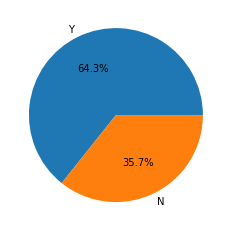

In [94]:
pie_ch = ds1['Play'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 1, startangle = 0)
pie_ch.set_ylabel('')
plt.show()

In [95]:
dummy_ds1 = pd.get_dummies(ds1.iloc[:,:-1])

cols = ds1.columns.tolist()
cols.remove("Play")

ds1 = ds1.drop(cols, axis = 1)
ds1 = pd.concat([dummy_ds1,ds1], axis = 1)

print("\nDataset 1 after concat:\n")
ds1.head()


Dataset 1 after concat:



,Outlook_O,Outlook_R,Outlook_S,Temp_C,Temp_H,Temp_M,Humidity_High,Humidity_Low,Humidity_Normal,Wind_F,Wind_T,Play
0,0,1,0,0,1,0,0,0,1,1,0,N
1,0,1,0,0,1,0,1,0,0,0,1,N
2,1,0,0,0,1,0,0,0,1,1,0,Y
3,0,0,1,0,0,1,0,0,1,1,0,Y
4,0,0,1,1,0,0,0,0,1,1,0,Y


In [96]:
print("\nLabels\n")
labels = ds1['Play']
print(labels)


Labels

0     N
1     N
2     Y
3     Y
4     Y
5     N
6     Y
7     N
8     Y
9     Y
10    Y
11    Y
12    Y
13    N
Name: Play, dtype: object


**Splitting the dataset into the training and testing dataset. (Roll no: 7)
  => Set Random state of model equals to your roll number**

In [97]:
training_data, testing_data, training_target, testing_target = train_test_split(ds1.iloc[:,:-1], labels, test_size = 0.30, random_state = 7)

Creating an instance of classifier and fitting the model.

In [98]:
dtc = DecisionTreeClassifier(max_leaf_nodes = 7, random_state = 7)
dtc.fit(training_data,training_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

Testing the model and getting accuracy score, confusion matrix, precision score and recall score

In [99]:
# Testing
prediction_target = dtc.predict(testing_data)

# Getting Accuracy
accuracy = accuracy_score(testing_target, prediction_target)
print("Accuracy Score:\n", accuracy)

# Getting Confusion Matrix
cm = confusion_matrix(testing_target, prediction_target)
print("\nConfusion Matrix:\n",cm)

# Getting Precision
precision = precision_score(testing_target, prediction_target, average=None)
print("\nPrecision Score:\n", precision)

# Getting Recall
recall = recall_score(testing_target, prediction_target, average=None)
print("\nRecall Score:\n", recall)

Accuracy Score:
 0.4

Confusion Matrix:
 [[1 1]
 [2 1]]

Precision Score:
 [0.33333333 0.5       ]

Recall Score:
 [0.5        0.33333333]


**(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?**

**(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?**

In [100]:
'''
Rainy = 0,1,0
Mild = 0,0,1
Normal = 0,0,1
False = 1,0
'''
case1 = [0,1,0,0,0,1,0,0,1,1,0]

'''
Sunny = 0,0,1
Cool = 1,0,0
High = 1,0,0
True = 0,1
'''
case2 = [0,0,1,1,0,0,1,0,0,0,1]


features = ds1.columns.tolist()
features.remove("Play")
data_frame = pd.DataFrame([case1,case2], columns = features)
data_frame.head()

,Outlook_O,Outlook_R,Outlook_S,Temp_C,Temp_H,Temp_M,Humidity_High,Humidity_Low,Humidity_Normal,Wind_F,Wind_T
0,0,1,0,0,0,1,0,0,1,1,0
1,0,0,1,1,0,0,1,0,0,0,1


In [101]:
pred = dtc.predict(data_frame)
print("Prediction on whether play or not:\ncase1: {}\tcase2: {}".format(pred[0],pred[1]))

Prediction on whether play or not:
case1: N	case2: Y


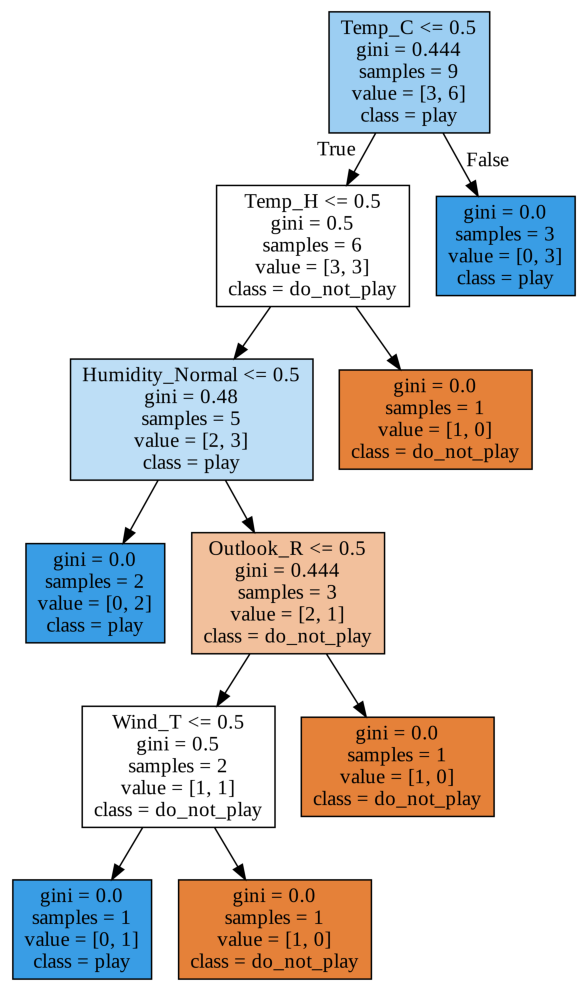

In [102]:
export_graphviz(dtc, out_file='tree_entropy.dot',
               feature_names=features,
               class_names=['do_not_play','play'], 
               filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

[Text(223.20000000000002, 199.32, 'X[3] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = play'), Text(167.4, 163.07999999999998, 'X[4] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = do_not_play'), Text(111.60000000000001, 126.83999999999999, 'X[8] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = play'), Text(55.800000000000004, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = play'), Text(167.4, 90.6, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = do_not_play'), Text(111.60000000000001, 54.359999999999985, 'X[10] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = do_not_play'), Text(55.800000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = play'), Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = do_not_play'), Text(223.20000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = do_not_play'), Text(223.20000000000002, 126.83999999999999, 

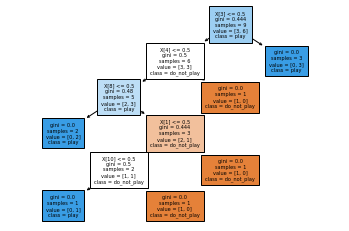

In [103]:
print(plot_tree(dtc,  class_names = ['do_not_play','play'], fontsize = 5, filled=True, impurity=True))